# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

##### Write your answer here and turn the cell type into markdown

#####Here we can use machine learning because the concerned problem of flight delays can occur due to various factors like hour of departure, the time at which it is supposed to start, the delay in boardings, seasonal factors etc. Machine leaening helps to make predictions by looking into all these factors. By incorporating all these factors a model developed using ML will allow us to identify patterns and make predictions of future flights that inturn helps the airline companies to make proper predictions and give notifications to the customers

### 2. Formulate the business problem, success metrics, and desired ML output.

### Write your answer here and turn the cell type into markdown

##Business Problem:Flight delay occurance is a vary common thing that happens all around the world. That too the delay happening due to weather reasons are often bound to happen. Here the company wants to inform the clients or the customers if the flight can be delayed due to the wather at the time of booking from the airports in USA.

###Success Metrics: The effective impact of the model can be identified by various results on the success of accurately identifying the flights that are bound to get delayed due to the weather condition which is referred to as the recall, the precision of the delays, the F1-score that identifies the balance between precision and recall, ROC-AUC that helps to determine the capability of the models descrimination.

###Desired ML output: The output can be prediction from 0 to 1 or binary classification like Yes or No which determines if the earlier scheduled flight is likely to get delayed due to the weather.

### 3. Identify the type of ML problem you’re dealing with.

## Write your answer here and turn the cell type into markdown

###The task is basically a binary classification task that determines if the flight will get dealyed or not because of the weather conditions. We have already been given access to the datasets containing information about the flights on-time performance. We are using these datasets to train the ML model to predict if these flights are likely to get delayed due to the weather at the busiest airports when the customers are trying to book the flights.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [3]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'C:/Users/aravi/Desktop/final_project_dataset'
base_path = 'C:/Users/aravi/Desktop/final_project_dataset'
csv_base_path = 'C:/Users/aravi/Desktop/final_project_dataset/extracted_zip_files'

!mkdir -p {csv_base_path}
#import os
#os.makedirs(csv_base_path, exist_ok=True)

print("Extraction directory created at:", os.path.abspath(csv_base_path))

Extraction directory created at: C:\Users\aravi\Desktop\final_project_dataset\extracted_zip_files


The syntax of the command is incorrect.


In [4]:
# How many zip files do we have? write a code to answer it.
import glob

In [5]:


# Get all zip files in that folder
zip_files = glob.glob(os.path.join(zip_path, "*.zip"))

# Print the count
print("Number of ZIP files:", len(zip_files))

Number of ZIP files: 60


#### Extract CSV files from ZIP files

In [6]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f"Extracting → {os.path.basename(zipFile_name)}")
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip
Extracting → On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_9.zip
E

In [7]:
# How many csv files have we extracted? write a code to answer it.

csv_base_path = "C:/Users/aravi/Desktop/final_project_dataset/extracted_zip_files"   # change this to your actual extraction folder

# Find all CSV files in that folder
csv_files = glob.glob(os.path.join(csv_base_path, "*.csv"))

# Print results
print("Number of CSV files extracted:", len(csv_files))


Number of CSV files extracted: 60


There are 60 csv files that has been extracted to the extracted z.ip files folder.

Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [7]:
df_temp = pd.read_csv("C://Users//aravi//Desktop//final_project_dataset//extracted_zip_files//On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")


**Question**: Print the row and column length in the dataset, and print the column names.

In [10]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [11]:
# Enter your code here
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [12]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [13]:
# Enter your code here
delay_columns = [col for col in df_temp.columns if 'Del' in col]

#here we iterate through each column name in the csv file and find the column names that has 'del' in it
print("Columns containing the word 'Del':")
print('##################################')
for col in delay_columns:
    print(col)


Columns containing the word 'Del':
##################################
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [14]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])
print("**************")
print("The years in this dataset are: ", df_temp['Year'])
print("**************")
print("The months covered in this dataset are: ",  df_temp['Month'])
print("**************")
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
print("**************")
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))
print("**************")
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))
print("**************")
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))

The #rows and #columns are  585749  and  110
**************
The years in this dataset are:  0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
585744    2018
585745    2018
585746    2018
585747    2018
585748    2018
Name: Year, Length: 585749, dtype: int64
**************
The months covered in this dataset are:  0         9
1         9
2         9
3         9
4         9
         ..
585744    9
585745    9
585746    9
585747    9
585748    9
Name: Month, Length: 585749, dtype: int64
**************
The date range for data is : 2018-09-01  to  2018-09-30
**************
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
**************
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', '

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [15]:
counts = pd.DataFrame({'Origin':df_temp['Origin'].value_counts(), 'Destination':df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [16]:
counts.sort_values(by="Origin",ascending=False).head(15 )# Enter your code here

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

#Enter your answer here

#In this scenario we can say that ,it is possible to make a prediction if a flight has chances of delay or not. Based on the information and patterns of the historical data on various factors, we can make adequate predictions.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [18]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one DataFrame
    csv_files: list of csv file paths
    filter_cols: list of columns to keep
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    file_name: output CSV file name (optional)
    """
    
    # Creating an empty DataFrame to store all combined data
    df = pd.DataFrame()

    for file in csv_files:
        try:
            # reading each csv file
            temp_df = pd.read_csv(file, low_memory=False)
            print(temp_df)
            
            # marking the selected columns
            temp_df = temp_df[filter_cols]
            
            #filtering the rows for creating the subset of airports and aurlines as subset_cols and subset_vals
            for col, vals in zip(subset_cols, subset_vals):
                temp_df = temp_df[temp_df[col].isin(vals)]
            
            #concatenating the data with the empty datframe by appending it.
            df = pd.concat([df, temp_df], ignore_index=True)
            
            print(f"Successfully processed: {file}")
        
        except Exception as e:
            print(f"Skipped {file} due to error: {e}")
    
    return df


In [19]:
#cols is the list of columns to predict Arrival Delay 
filter_cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [20]:
start = time.time()

combined_csv_filename = f"{base_path}/combined_files.csv"

# < write code to call the combined_csv function>
df = combine_csv(csv_files, filter_cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

        Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2014        1      1          30          4  2014-01-30   
1       2014        1      1          31          5  2014-01-31   
2       2014        1      1           1          3  2014-01-01   
3       2014        1      1           2          4  2014-01-02   
4       2014        1      1           3          5  2014-01-03   
...      ...      ...    ...         ...        ...         ...   
471944  2014        1      1          25          6  2014-01-25   
471945  2014        1      1          26          7  2014-01-26   
471946  2014        1      1          27          1  2014-01-27   
471947  2014        1      1          28          2  2014-01-28   
471948  2014        1      1          29          3  2014-01-29   

       Reporting_Airline  DOT_ID_Reporting_Airline  \
0                     AA                     19805   
1                     AA                     19805   
2                     AA         

#### Load dataset

Load the combined dataset.

In [21]:
import os

#creating a file called combined_files.csv to save the merged content.
combined_csv_filename = r"C:\Users\aravi\Desktop\final_project_dataset\combined_files.csv"

# force-save explicitly
df.to_csv(combined_csv_filename, index=False)

# verify it exists and its size
print(os.path.exists(combined_csv_filename))
if os.path.exists(combined_csv_filename):
    print("Size (MB):", round(os.path.getsize(combined_csv_filename) / (1024*1024), 2))


True
Size (MB): 131.3


In [22]:
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [23]:
# Enter your code here 

data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [24]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ",list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
The months covered in this dataset are:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [25]:
data.rename(columns={'ArrDel15':'is_delay'}, inplace=True) # Enter your code here

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [26]:
data.isnull().sum(axis=0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [27]:
### Remove null columns
# Remove rows with missing arrival delay or airtime information
data = data[~data[['ArrDelay', 'ArrDelayMinutes', 'AirTime']].isnull().any(axis=1)]

Get the hour of the day in 24-hour time format from CRSDepTime.

In [28]:
data['DepHourofDay'] = (data['CRSDepTime'] // 100).astype(int)
print(data['DepHourofDay'])

0          21
1           9
2          18
3          16
4           7
           ..
1658125    11
1658126     8
1658127    12
1658128    22
1658129    16
Name: DepHourofDay, Length: 1635590, dtype: int64


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

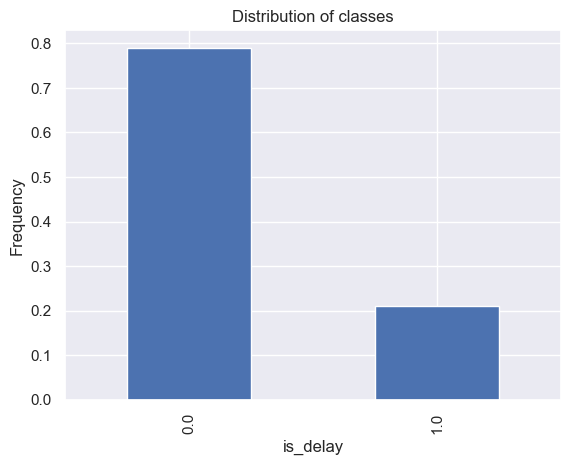

In [29]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

#here we use the information from the column is_delay to count the number of flights that got delayed and those not got delayed

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

# Enter your answer here and turn the cell type to markdown

###The graph shows a bar plot. Here the left bar shows the flights that are not delayed which is almost 80% and the right bar shows flights delayed by 15 minutes. The graph has class imbalance problem as the dataset reflects that the number of on-time flights are much higher than the number of delayed flights which shows that a classification model has to be used here to train the model on this data but need to address the imbalance properly.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

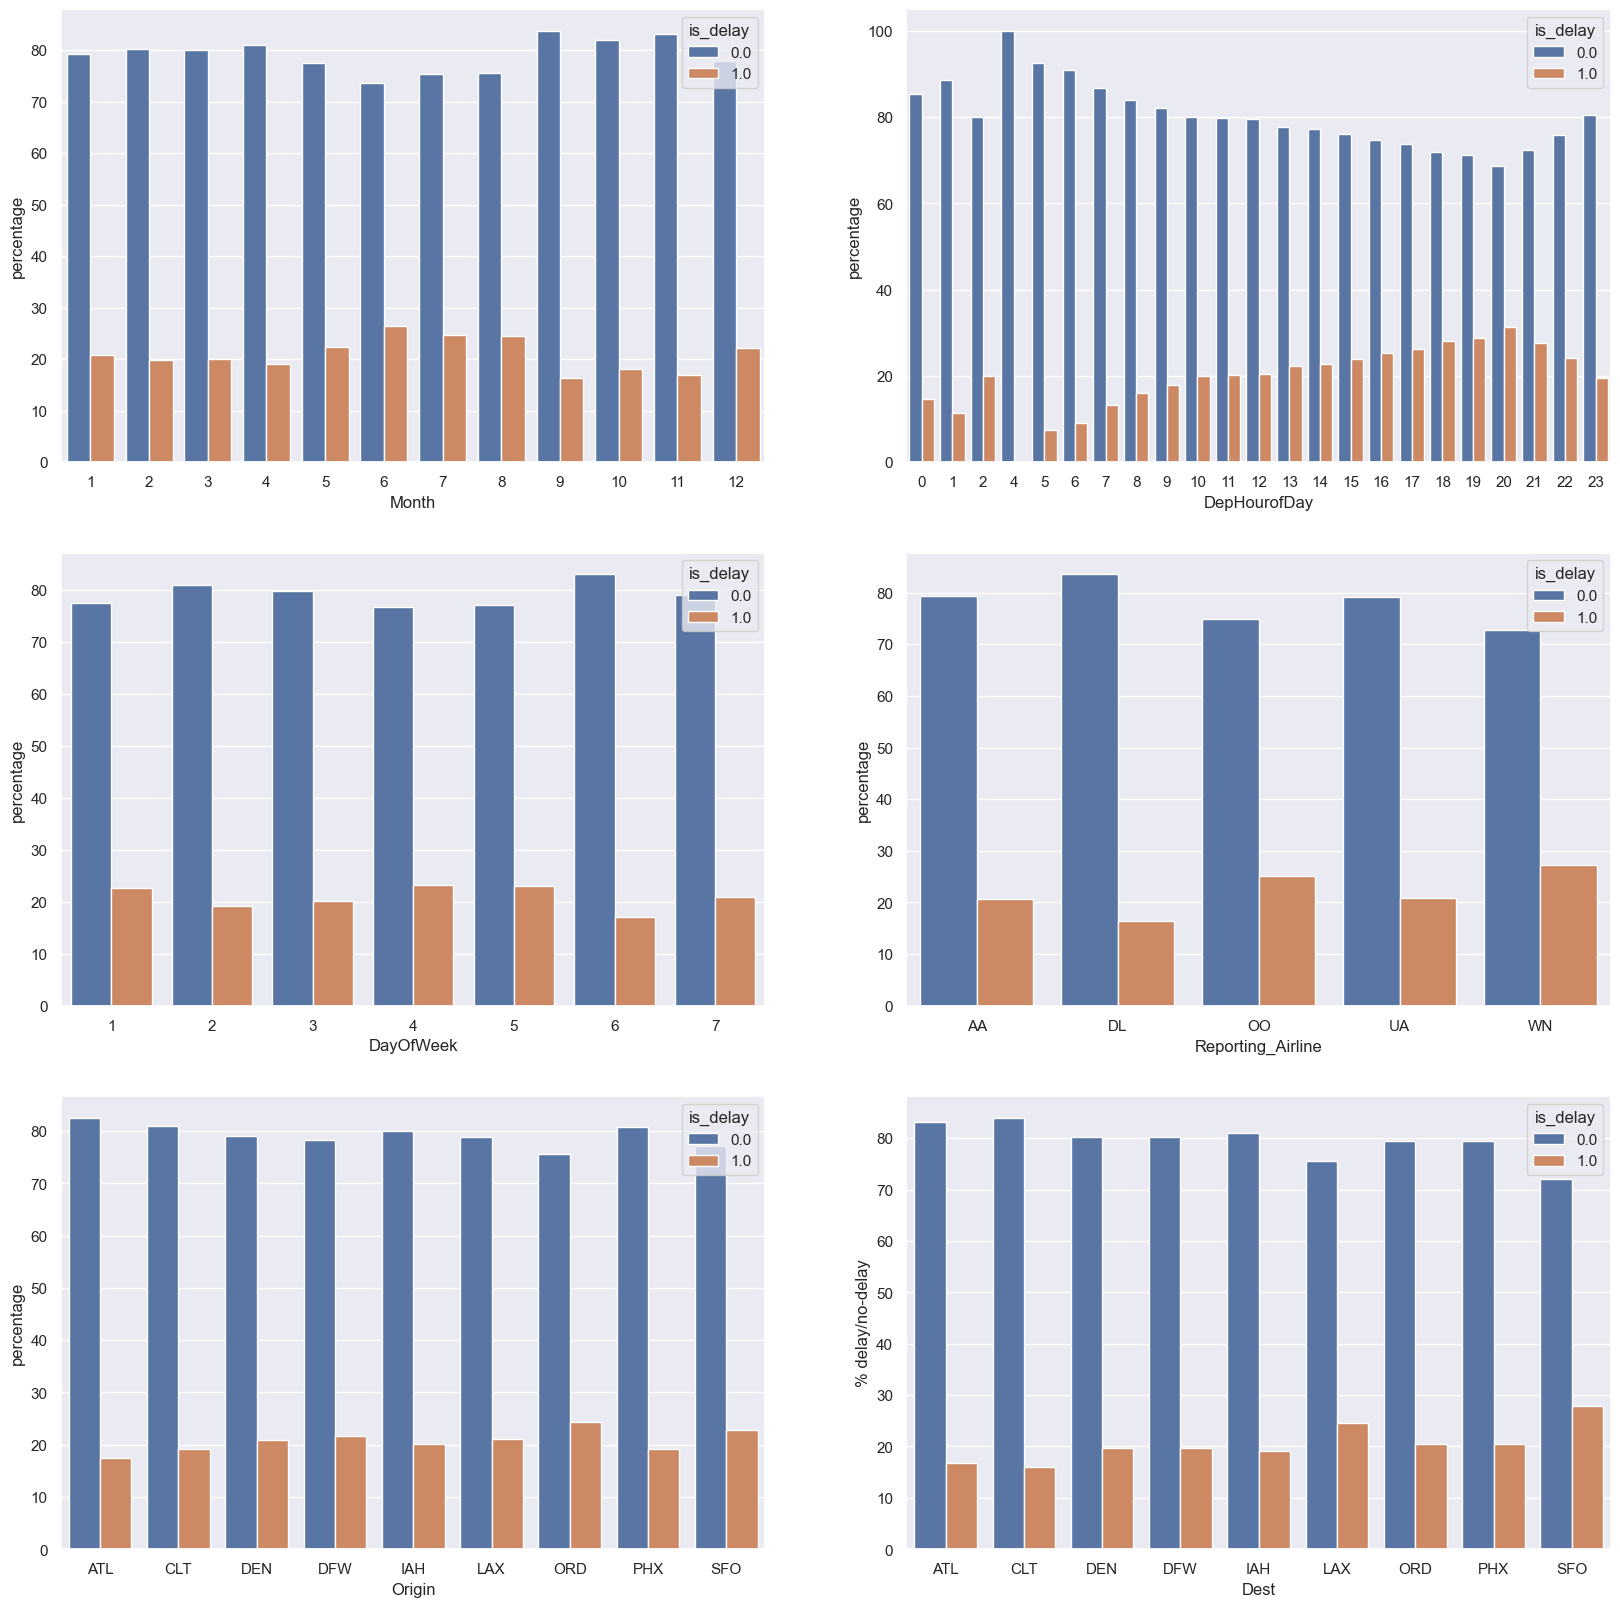

In [30]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

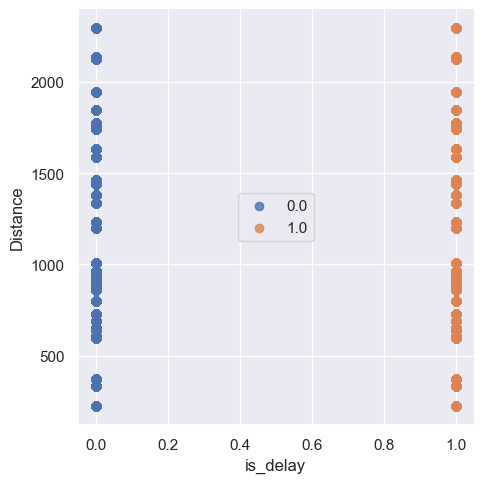

In [31]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

##Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown

###The most delays were seen in the months from june to august from percentage-month graph
###The time at which most of the delays were seen is usually 8 pm. Generally the range of time that shows delayed flight operations occurs between 3 to 9 pm
###Thursday, friday and sunday are showing that those days has most number of delayed flights
###The airlines that often gets delayed are WN and OO
###Based on the origin, airport ORD has the highest delay. Based on destination , airport SFO shows the highest chance for delaying.
###Apparantely, flight distance is not a big factor for the delays, because other factors here like the weather contributes more towards causing flight delays.

### Features

Look at all the columns and what their specific types are.

In [32]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [33]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [34]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

In [35]:
print(data.dtypes)

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [36]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [37]:
# Enter your code here

print("Number of rows:", len(data))
print("Number of columns:", len(data.columns))

Number of rows: 1635590
Number of columns: 94


In [38]:
# Enter your code here'
print(data.columns)

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [39]:
data.rename(columns = {'is_delay': 'target'}, inplace=True )# Enter your code here


In [40]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

# Step for saving the combined dataset to local computer
combined_csv_v1_filename = r"C:\Users\aravi\Desktop\final_project_dataset\combined_csv_v1.csv"

# Saving without the index column
data.to_csv(combined_csv_v1_filename, index=False)

# Verify the file exists and print its size
import os
print(os.path.exists(combined_csv_v1_filename))
if os.path.exists(combined_csv_v1_filename):
    print("Saved successfully:", round(os.path.getsize(combined_csv_v1_filename) / (1024 * 1024), 2))


True
Saved successfully: 868.0


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [41]:
# write Code here to split data into train, validate and test

#Model training and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features (X) and target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Splitting  the data into train (80%) and test (20%)
train_data, test_data, train_label, test_label = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1308472, 93)
Testing data shape: (327118, 93)


### Baseline classification model

In [42]:
print("kk")
# Initialize the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000, solver='lbfgs')

print("kp")
# Train the model on training data
baseline_model.fit(train_data, train_label)

print("ks")
# Make predictions on test data
baseline_predictions = baseline_model.predict(test_data)

# Evaluate the baseline model
print("Baseline Model Accuracy:", round(accuracy_score(test_label, baseline_predictions), 4))
print("\nConfusion Matrix:\n", confusion_matrix(test_label, baseline_predictions))
print("\nClassification Report:\n", classification_report(test_label, baseline_predictions))

kk
kp
ks
Baseline Model Accuracy: 0.7903

Confusion Matrix:
 [[258287    165]
 [ 68442    224]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258452
         1.0       0.58      0.00      0.01     68666

    accuracy                           0.79    327118
   macro avg       0.68      0.50      0.44    327118
weighted avg       0.75      0.79      0.70    327118



## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [43]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

In [44]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    # complete the code here
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

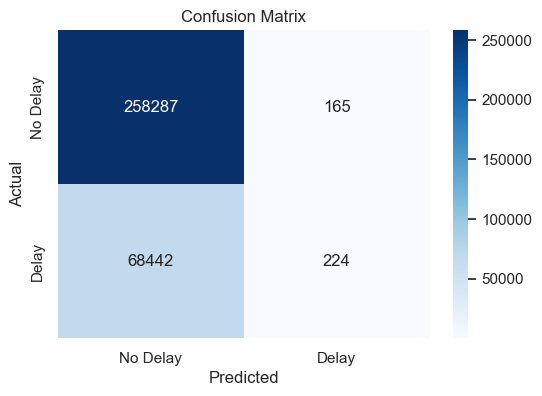

In [45]:
# Enter you code here
plot_confusion_matrix(test_label, baseline_predictions)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

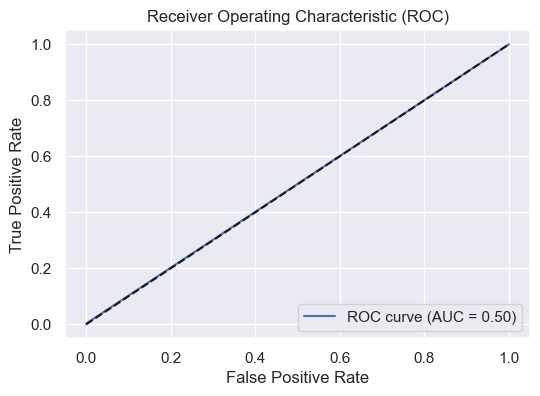

In [46]:
# Enter you code here
plot_roc(test_label, baseline_predictions)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


# Enter your answer here and turn the cell type into markdown

From the output received using the confusion matrix, it gives us proof that the model is performing properly in predicting flights that are not delayed with a higher value for true negative(258287) with a small value for false positive(165). The model couldn't identify or perform well for knowing the value of delayed flights providing only a small value of 224. Apart from all this precision value of 79% seems good. Also, the lower value for recall clearly proves that the model is not that effective for identifying the delayed flights.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
!git init

Initialized empty Git repository in C:/Users/aravi/final_project/.git/


In [9]:
!git add .

In [10]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .ipynb_checkpoints/onpremises-checkpoint.ipynb
	new file:   onpremises.ipynb
	new file:   requirements.txt



In [11]:
!git commit -m "Initial commit - Flight delay assignment"

[master (root-commit) 1960dcb] Initial commit - Flight delay assignment
 3 files changed, 16873 insertions(+)
 create mode 100644 .ipynb_checkpoints/onpremises-checkpoint.ipynb
 create mode 100644 onpremises.ipynb
 create mode 100644 requirements.txt


In [12]:
!git branch -M main

In [13]:
!git remote add origin https://github.com/ARAVIND341/final_project_Data_Science.git

In [14]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/ARAVIND341/final_project_Data_Science.git
 * [new branch]      main -> main


### Provide a link for your GitHub repository here

https://github.com/ARAVIND341/final_project_Data_Science.git

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [49]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays

# 
data_orig['is_holiday'] = data_orig['FlightDate'].astype(str).isin(holidays).astype(int)
data_orig[['FlightDate', 'is_holiday']].head(10)

,FlightDate,is_holiday
0,2014-01-26,0
1,2014-01-26,0
2,2014-01-26,0
3,2014-01-26,0
4,2014-01-26,0
5,2014-01-26,0
6,2014-01-26,0
7,2014-01-26,0
8,2014-01-26,0
9,2014-01-26,0


Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [50]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [51]:
weather = pd.read_csv("C:/Users/aravi/Desktop/final_project_dataset/daily-summaries-2025-10-19T06-13-00.csv") # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
# creating new column in weather data
weather['airport'] = weather['STATION'].map(station_map)

weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX


Create another column called `MONTH` from the `DATE` column.

In [52]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [53]:
#ere we are replacing the missing values with 0

weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [54]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
print("TAVG_idx: ",TAVG_idx)
print("TMAX_idx: ",TMAX_idx)
print("TMIN_idx: ",TMIN_idx)

TAVG_idx:  [ 3956  3957  3958  3959  3960  3961  3962  3963  3964  3965  3966  3967
  3968  3969  3970  3971  3972  3973  3974  3975  3976  3977  3978  3979
  3980  3981  3982  3983  3984  3985  4017  4018  4019  4020  4021  4022
  4023  4024  4025  4026  4027  4028  4029  4030  4031  4032  4033  4034
  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044  4045  4046
  4047 13420]
TMAX_idx:  [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]
TMIN_idx:  [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [55]:
#here we are replacing the missing values with the mean value for the paticular airport. Here I am adding month as well for grouping
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


In [56]:
print(weather.columns.tolist())
print(weather_impute.columns.tolist())

['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'airport', 'MONTH']
['MONTH', 'STATION', 'TAVG', 'TMAX', 'TMIN']


Merge the mean data with the weather data.

In [57]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG',
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

print(weather.columns.tolist())

['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'airport', 'MONTH', 'TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG']


Check for missing values again.

In [58]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [59]:

weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)


In [60]:
print(weather.columns.tolist())

['DATE', 'AWND', 'PRCP', 'SNOW', 'TAVG', 'airport']


Add the origin and destination weather conditions to the dataset.

In [61]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [62]:
sum(data.isna().any())

0

In [63]:
data_orig.columns.tolist()

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'Origin',
 'OriginState',
 'Dest',
 'DestState',
 'CRSDepTime',
 'Cancelled',
 'Diverted',
 'Distance',
 'DistanceGroup',
 'ArrDelay',
 'ArrDelayMinutes',
 'is_delay',
 'AirTime',
 'DepHourofDay',
 'is_holiday',
 'AWND_O',
 'PRCP_O',
 'SNOW_O',
 'TAVG_O',
 'AWND_D',
 'PRCP_D',
 'SNOW_D',
 'TAVG_D']

Convert the categorical data into numerical data using one-hot encoding.

In [64]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')


In [65]:
data_dummies = pd.get_dummies(
    data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
          'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']],
    drop_first=True
)

# Combining encoded data with the rest
data = pd.concat([data, data_dummies], axis=1)

# Drop original categorical columns
data.drop(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
           'Reporting_Airline', 'Origin', 'Dest', 'is_holiday'],
          axis=1, inplace=True)



### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [66]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [67]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

print(data.columns)

Index(['target', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfW

In [74]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

# Saving the new combined CSV file to the local storage
combined_csv_v2_filename = r"C:\Users\aravi\Desktop\final_project_dataset\combined_csv_v2.csv"

# Saving without the index column
data.to_csv(combined_csv_v2_filename, index=False)

print("file successfully saved to the local")



file successfully saved to the local


Create the training and testing sets again.

In [75]:
# Enter your code here

from sklearn.model_selection import train_test_split

# keeping separate features as X and target variable  as y
X = data.drop('target', axis=1)
y = data['target']

# Spliting  the dataset into 80% training and 20% testing(80-20)
train_data, test_data, train_label, test_label = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (1308472, 85)
Testing data shape: (327118, 85)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [71]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(max_iter=1000, solver='lbfgs')

In [77]:
# Enter your code here

# Training the model
classifier2.fit(train_data, train_label)

# Making adequate predictions
predictions2 = classifier2.predict(test_data)

# Evaluating the model as before.
print("Accuracy for baseline classifier model is:", round(accuracy_score(test_label, predictions2), 4))
print("\nConfusion Matrix:\n", confusion_matrix(test_label, predictions2))
print("\nClassification Report:\n", classification_report(test_label, predictions2))


Accuracy for baseline classifier model is: 0.7925

Confusion Matrix:
 [[255278   3174]
 [ 64697   3969]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258452
         1.0       0.56      0.06      0.10     68666

    accuracy                           0.79    327118
   macro avg       0.68      0.52      0.49    327118
weighted avg       0.75      0.79      0.72    327118



Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Accuracy for new classifier model is: 0.7925

Confusion Matrix:
 [[255278   3174]
 [ 64697   3969]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258452
         1.0       0.56      0.06      0.10     68666

    accuracy                           0.79    327118
   macro avg       0.68      0.52      0.49    327118
weighted avg       0.75      0.79      0.72    327118



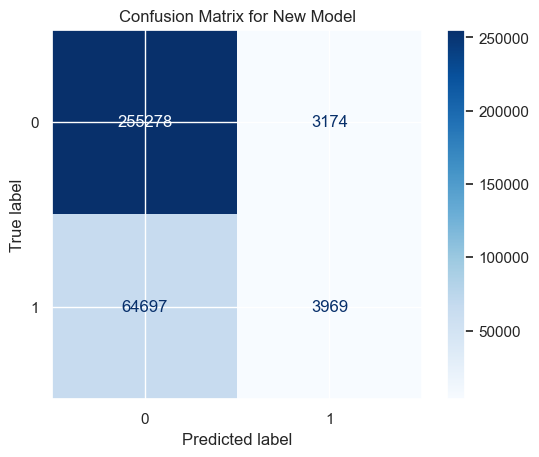

In [80]:
# Make predictions
predictions_new = classifier2.predict(test_data)  # your new model

# Evaluate the model as before
print("Accuracy for new classifier model is:", round(accuracy_score(test_label, predictions_new), 4))
print("\nConfusion Matrix:\n", confusion_matrix(test_label, predictions_new))
print("\nClassification Report:\n", classification_report(test_label, predictions_new))

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_label, predictions_new)).plot(cmap='Blues')
plt.title("Confusion Matrix for New Model")
plt.show()


Question: did you notice a difference by adding the extra data on the results?

# Enter answer here and turn the cell type into markdown
Once the  evaluation was done after subjecting the data to logistic regression with additional features, the indicators like accuracy and other performance indicators showed slight improvements when compared to initial results we got. The new features we added like the weather conditions and holiday indicators helped the model to process more features that can cause delays. These indicators proved the point that they provide valuable predictable indicators to predict proper information. Overall, the new model provided furthermore enhancements in generalization and better aligned with real world patterns in delay.


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

### copy the link here

https://public.tableau.com/app/profile/aravind.rajeev7799/viz/Flight_delay_analysis_17614636081140/Flight_delay_analysis?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

# write your answers here
1.The model achieved almost 79% accuracy that helped partially in determining or predicting the flight delays. The lower value of recall helped partially in detecting the delayed flights in the delay class. The model is reliable in detecting or predicting general things but it might struggle in real delay issues. If more time is given, we can work further on enhancing the models performance in addressing the imbalance of the classes using SMOTE or undersampling techniques. Also, we can use the other techniques like random forest, gradient boosting,XGBoost etc which is better than logistic regression. Also, techniques like hyperparameter tuning will also increase the possibility of optimizing model performance and providing better results

2.When changes were made to the dataset, it showed slight improvements in the performance metrics.In the former case, the model achieved an accuracy of 79.03% and in the latter case the accuracy value showed a slight improvement upto 79.25%.But the recall value was less. The improvement in accuracy was being seen due to the incorporation of contextual features like weather conditions and holiday features which shows us that these features considerably contributed to the predictions. We made the dataset even more better by undergoing feature engineering and data preprocessing which eventually made the model better.

3.One of the main challenges was dealing with the class imbalance between the flights that are delayed and non-delayed. Majority of the dataset had on-time flights which made the model more aligned to predicting the majority class.So, generating better values for recall and f1 was a challenge. Then the next challenge was in feature selection and data preprocessing. Careful management was required to ensure data consistancy when additional features like weather information,hodliday indicators etc. Also, challenges were often encountered during the evaluation process.Generating appropriate values was a crucial thing to do.

4.One important thing that I learned here is, how important is the quality of data and the feature engineering. The input data has a significant impact on the model performance than the algorithm. Also, merging the data with meaningful features always make the predictions more accurate and reliable.

Also, another important thing is, in the cases of datasets that shows class imbalance, along with accuracy, other performance metrics like precision, recall , f1 score has significant impact and helps in understanding the model performance.

Also, the involvement of ML pipleline that does a continuos process of data refinement, model tuning etc will be really helpful. Each iteration for the processes provides proper insights which leads to more generalized and reliable model.
        